# Installing Keras

In [ ]:
!pip install tensorflow -U

# Import the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

# Getting the Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)                                        # (60000, 28, 28)
print(y_train.shape)                                        # (60000,)

print(X_test.shape)                                         # (10000, 28, 28)
print(y_test.shape)                                         # (10000,)

print(X_train[0])
print(y_train[0])

In [ ]:
X_train

In [ ]:
# format the data clearly to see the digit
# get the rows and columns of the data
rows    = X_train[0].shape[0]
columns = X_train[0].shape[1]

# used to store all the numbers of the digits
lines = ''
for r in range(rows):
    lines += ''.join([f'{i}'.ljust(3) for i in X_train[0][r]]) + "\n"
print(lines)

# Visualizing the Dataset

In [ ]:
# show the first 5 images in the training set
for index in range(5):
    plt.imshow(X_train[index])
    plt.colorbar()
    plt.grid(True)
    plt.xlabel(y_train[index])
    plt.show()  


# Reshaping the Data

In [ ]:
RESHAPED = 784                                                 # 28x28 = 784

# training set 
X_train = X_train.reshape(60000, RESHAPED)
X_train = X_train.astype('float32')
print(X_train.shape)                                           # (60000, 784)

# test set
X_test = X_test.reshape(10000, RESHAPED)
X_test = X_test.astype('float32')
print(X_test.shape)                                            # (10000, 784)


# Normalizing the Data

In [ ]:
# normalize (convert to greyscale)
X_train /= 255
X_test /= 255

print(X_train[0])

# One-Hot Encoding

In [ ]:
NB_CLASSES = 10                           # number of outputs = number of digits

# convert class vectors to binary class matrices - one-hot encoding
Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES)

# label for first row in training set
print(y_train[0])

# label (one-hot encoded) for first row in training set
print(Y_train[0])

# second row
print(y_train[1])     # label
print(Y_train[1])     # one-hot encoded

# third row
print(y_train[2])     # label
print(Y_train[2])     # one-hot encoded


# Building the Model

In [ ]:
model = Sequential()   # a linear stack of layers

# #---1---
# # input, output layers, and activation function
# model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,), activation = 'softmax'))

# #---2---
# N_HIDDEN = 128
# model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,), activation = 'relu'))  
# model.add(Dense(NB_CLASSES, activation = 'relu')) 
# model.add(Dense(NB_CLASSES, activation = 'softmax'))

# ---3---
from tensorflow.keras.layers import Dropout
DROPOUT = 0.2

# input, output layers, and activation function
N_HIDDEN = 128
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,), activation = 'relu')) 
model.add(Dropout(DROPOUT))

model.add(Dense(NB_CLASSES, activation = 'relu'))  
model.add(Dropout(DROPOUT))

model.add(Dense(NB_CLASSES, activation = 'softmax'))  

model.summary()


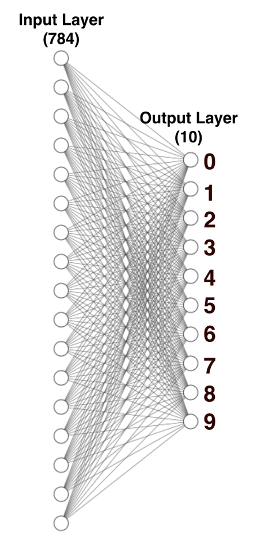

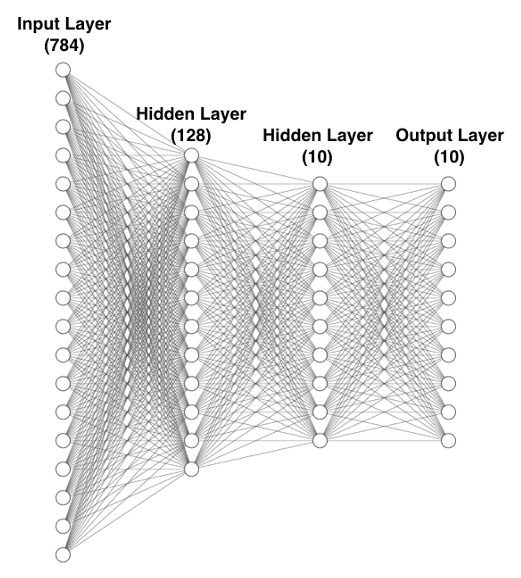

In [ ]:
# find out how many layers the model has
len(model.layers)

# Compiling the Model

In [ ]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam 

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
#             optimizer=RMSprop(),
              metrics=['accuracy'])  # either: accuracy, recall, or precision

# Training the Model

In [ ]:
NB_EPOCH         = 200
BATCH_SIZE       = 128         # number of training instances observed before 
                               # the optimizer performs a weight update
VERBOSE          = 1
VALIDATION_SPLIT = 0.2         # how much TRAIN is reserved for VALIDATION

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


# Evaluating the Model

In [ ]:
# score the model using the test set
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nLoss value:", score[0])
print('Test accuracy:', score[1])


# Plotting the Training Accuracy and Validation Accuracy Chart

In [ ]:
# list all data in history
print(history.history.keys())
'''
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
'''

# Training accuracy is the percentage of correct predictions made by the 
# model on the training dataset. This metric reflects how well the model 
# is fitting the training data.

# Validation accuracy is the percentage of correct predictions made by
# the model on a separate validation dataset, which is not used during 
# training. This dataset simulates how the model would perform on unseen 
# data.


# Overfitting: When training accuracy is much higher than validation accuracy, 
# the model is overfitting to the training data and failing to generalize.

# Underfitting: When both training and validation accuracies are low, the model
# might be underfitting, meaning it’s too simple to capture the underlying 
# patterns in the data.

# When both training and validation accuracies are high and close to each other, 
# it indicates that the model is generalizing well to new data.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# Plotting the Training Loss and Validation Loss Chart

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()


# Performing Predictions

In [ ]:
# try out using a digit from the test set

#=========
index = 199
#=========

# shape of X_test
print(X_test.shape)                  # (10000, 784)

# shape of the first item in X_test  # (784,)
print(X_test[index].shape)

# in order to do prediction, you need to send in a 2-d array of shape (,784)
x = X_test[index].reshape(-1,784)
print(x.shape)                       # (1,784)

# show the number
plt.imshow(X_test[index].reshape(28,28), interpolation='none')
plt.title("Digit: {}".format(y_test[index]))


In [ ]:
# you can do the prediction now
print(model.predict(x))


In [ ]:
# the predict_classes() is deprecated
# print(model.predict_classes(x))           # [3]

# see the original value
print(Y_test[index])                      # [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
#---updated---
print(np.argmax(model.predict(x), axis=-1))

# see the original value
print(Y_test[index])                      # [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Saving the Trained Model

In [ ]:
# creates a HDF5 file 'trained_model.h5'
model.save('trained_model.h5')          
  
# deletes the existing model
del model


# Loading the Trained Model

In [ ]:
from tensorflow.keras.models import load_model

# returns a compiled model identical to the previous one
import numpy as np
model = load_model('trained_model.h5')


In [ ]:
print(np.argmax(model.predict(x), axis=-1))   # [3]


# Visualizing your Neural Network Architecture

In [ ]:
# install the libraries to visualize the model
!pip install pydot 
!pip install graphviz 

# for Mac, do a $ brew install graphviz
# For Windows, download Graphviz binaries from https://graphviz.org/download/#windows


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
